### Importamos las librerias necesitaremos

In [60]:
import pandas as pd

In [61]:
import seaborn as sns

In [111]:
import matplotlib.pyplot as plt

### Leemos el excel, ignorando las 2 primeras filas ya que no nos interesan, y luego le quitamos todas las filas vacias que tiene

In [63]:
data = pd.read_excel('data.csv',skiprows=2)

In [64]:
data.dropna(inplace=True)

### Primer vistazo a los datos

In [65]:
data.head()

,Date&Time,O3,NO,NO2,NOx,CO,SO2,PM2.5
1,2018-12-01 00:00:00,4.7,8.8,13.9,22.7,4.4,1.8,10.1
2,2018-12-01 00:01:00,4.4,8.8,13.8,22.6,4.41,2,10.4
3,2018-12-01 00:02:00,4,8.9,13.6,22.5,4.4,2.1,10.9
4,2018-12-01 00:03:00,3.4,8.7,13.6,22.3,4.38,1.8,11.1
5,2018-12-01 00:04:00,2.3,8.6,13.3,21.9,4.36,1.9,11.2


### Promedio de Oxido nitroso en esos 2 dias

In [107]:
data['NO2'].mean()

14.611562499999966

### Convirtiendo el campo de fecha a un campo de Fecha Real

In [108]:
data['Date'] = pd.to_datetime(data['Date&Time'])

### Nos aseguramos que el nuevo campo Date haya sido creado

In [68]:
data.head()

,Date&Time,O3,NO,NO2,NOx,CO,SO2,PM2.5,Date
1,2018-12-01 00:00:00,4.7,8.8,13.9,22.7,4.4,1.8,10.1,2018-12-01 00:00:00
2,2018-12-01 00:01:00,4.4,8.8,13.8,22.6,4.41,2,10.4,2018-12-01 00:01:00
3,2018-12-01 00:02:00,4,8.9,13.6,22.5,4.4,2.1,10.9,2018-12-01 00:02:00
4,2018-12-01 00:03:00,3.4,8.7,13.6,22.3,4.38,1.8,11.1,2018-12-01 00:03:00
5,2018-12-01 00:04:00,2.3,8.6,13.3,21.9,4.36,1.9,11.2,2018-12-01 00:04:00


In [109]:
%matplotlib inline

### Creamos un indice con el campo fecha para poder trabajar en graficas con ellas.

In [110]:
index = pd.DatetimeIndex(data['Date'])

### Empezamos a graficar, se hace una Serie con el campo que queremos y el indice, se crea el plot y se guarda en disco

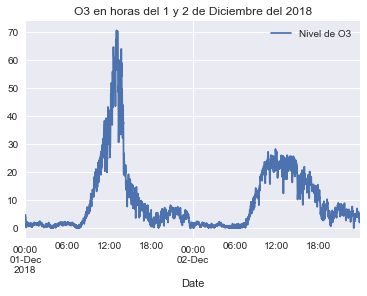

In [106]:
dataO3 = pd.Series(data['O3'].values, index=index)
plot = dataO3.plot(kind='line',title='O3 en horas del 1 y 2 de Diciembre del 2018',legend=True, label='Nivel de O3')
figure = plot.get_figure()
figure.savefig("O3.png")

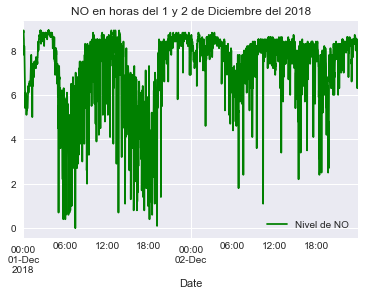

In [114]:
dataNO = pd.Series(data['NO'].values, index=index)
plot = dataNO.plot(kind='line',title='NO en horas del 1 y 2 de Diciembre del 2018',legend=True,color='g', label='Nivel de NO')
figure = plot.get_figure()
figure.savefig("NO.png")

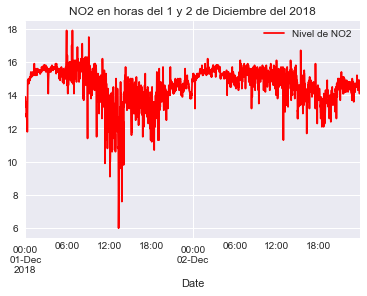

In [115]:
dataNO2 = pd.Series(data['NO2'].values, index=index)
plot = dataNO2.plot(kind='line',title='NO2 en horas del 1 y 2 de Diciembre del 2018',legend=True,color='r', label='Nivel de NO2')
figure = plot.get_figure()
figure.savefig("NO2.png")

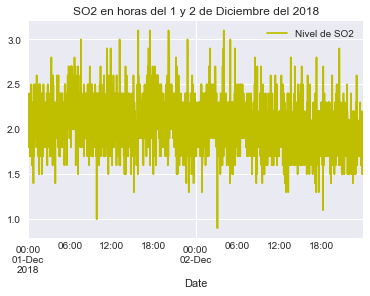

In [116]:
dataSO2 = pd.Series(data['SO2'].values, index=index)
plot = dataSO2.plot(kind='line',title='SO2 en horas del 1 y 2 de Diciembre del 2018',color='y',legend=True, label='Nivel de SO2')
figure = plot.get_figure()
figure.savefig("SO2.png")

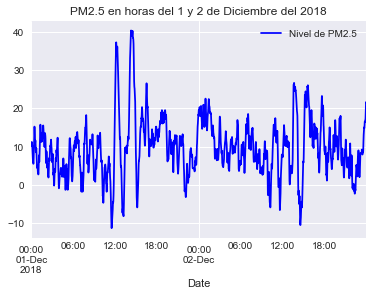

In [127]:
dataPM = pd.Series(data['PM2.5'].values, index=index)
plot = dataPM.plot(kind='line',title='PM2.5 en horas del 1 y 2 de Diciembre del 2018',color='b',legend=True, label='Nivel de PM2.5')
figure = plot.get_figure()
figure.savefig("PM.png")

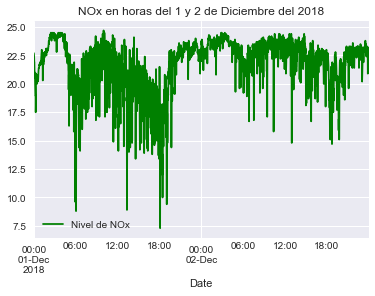

In [128]:
dataNOx = pd.Series(data['NOx'].values, index=index)
plot = dataNOx.plot(kind='line',title='NOx en horas del 1 y 2 de Diciembre del 2018',color='g',legend=True, label='Nivel de NOx')
figure = plot.get_figure()
figure.savefig("NOx.png")

In [93]:
def to_number(n):
    if(isinstance(n, float) or isinstance(n,int)):
        return n
    else:
        return float(n.replace(' ',''))
    

### El campo de "CO", tiene algunos numeros mal, por lo que reemplazamos espacios vacios para poder convertirlos a numeros

In [97]:
data['CO'] = data['CO'].map(to_number)

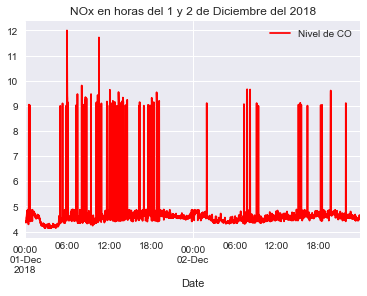

In [129]:
dataCO = pd.Series(data['CO'].values, index=index)
pd.to_numeric(dataCO, errors='coerce')
plot = dataCO.plot(kind='line',title='NOx en horas del 1 y 2 de Diciembre del 2018',color='r',legend=True, label='Nivel de CO')
figure = plot.get_figure()
figure.savefig("CO.png")